In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('results_noise_level.csv')
data['bias_squared'] = data['bias'] ** 2
data.head()

,Function,noise_level,test_id,bias,variance,mse,bias_squared
0,func_cos,0.1,1,0.035278,0.033819,0.035064,0.001245
1,func_cos,0.1,2,-0.761440,0.854288,1.434079,0.579791
2,func_cos,0.1,3,-0.077675,0.234402,0.240435,0.006033
3,func_cos,0.1,4,-0.468812,0.460581,0.680366,0.219785
4,func_cos,0.1,5,0.151636,0.015390,0.038384,0.022994


In [4]:
data_melted = data.melt(id_vars=['Function', 'noise_level','test_id'], var_name='statistics', value_name='value')
data_melted = data_melted[data_melted['statistics'] != 'bias']
data_melted.drop(columns=['test_id'], inplace=True)

data_melted['Function'] = data_melted['Function'].apply(lambda x: x.replace('func_', ''))
data_melted.head()

,Function,noise_level,statistics,value
2800,cos,0.1,variance,0.033819
2801,cos,0.1,variance,0.854288
2802,cos,0.1,variance,0.234402
2803,cos,0.1,variance,0.460581
2804,cos,0.1,variance,0.015390


In [5]:
def signal_level(row):
    if row['Function'] == 'func_cos':
        return 1
    elif row['Function'] == 'func_xor':
        return 10
    elif row['Function'] == 'func_and':
        return 50
    elif row['Function'] == 'func_poly_deg2':
        return 1

data_melted['signal_level'] = data_melted.apply(signal_level, axis=1)
data_melted['noise_to_signal'] = data_melted['noise_level'] / data_melted['signal_level']

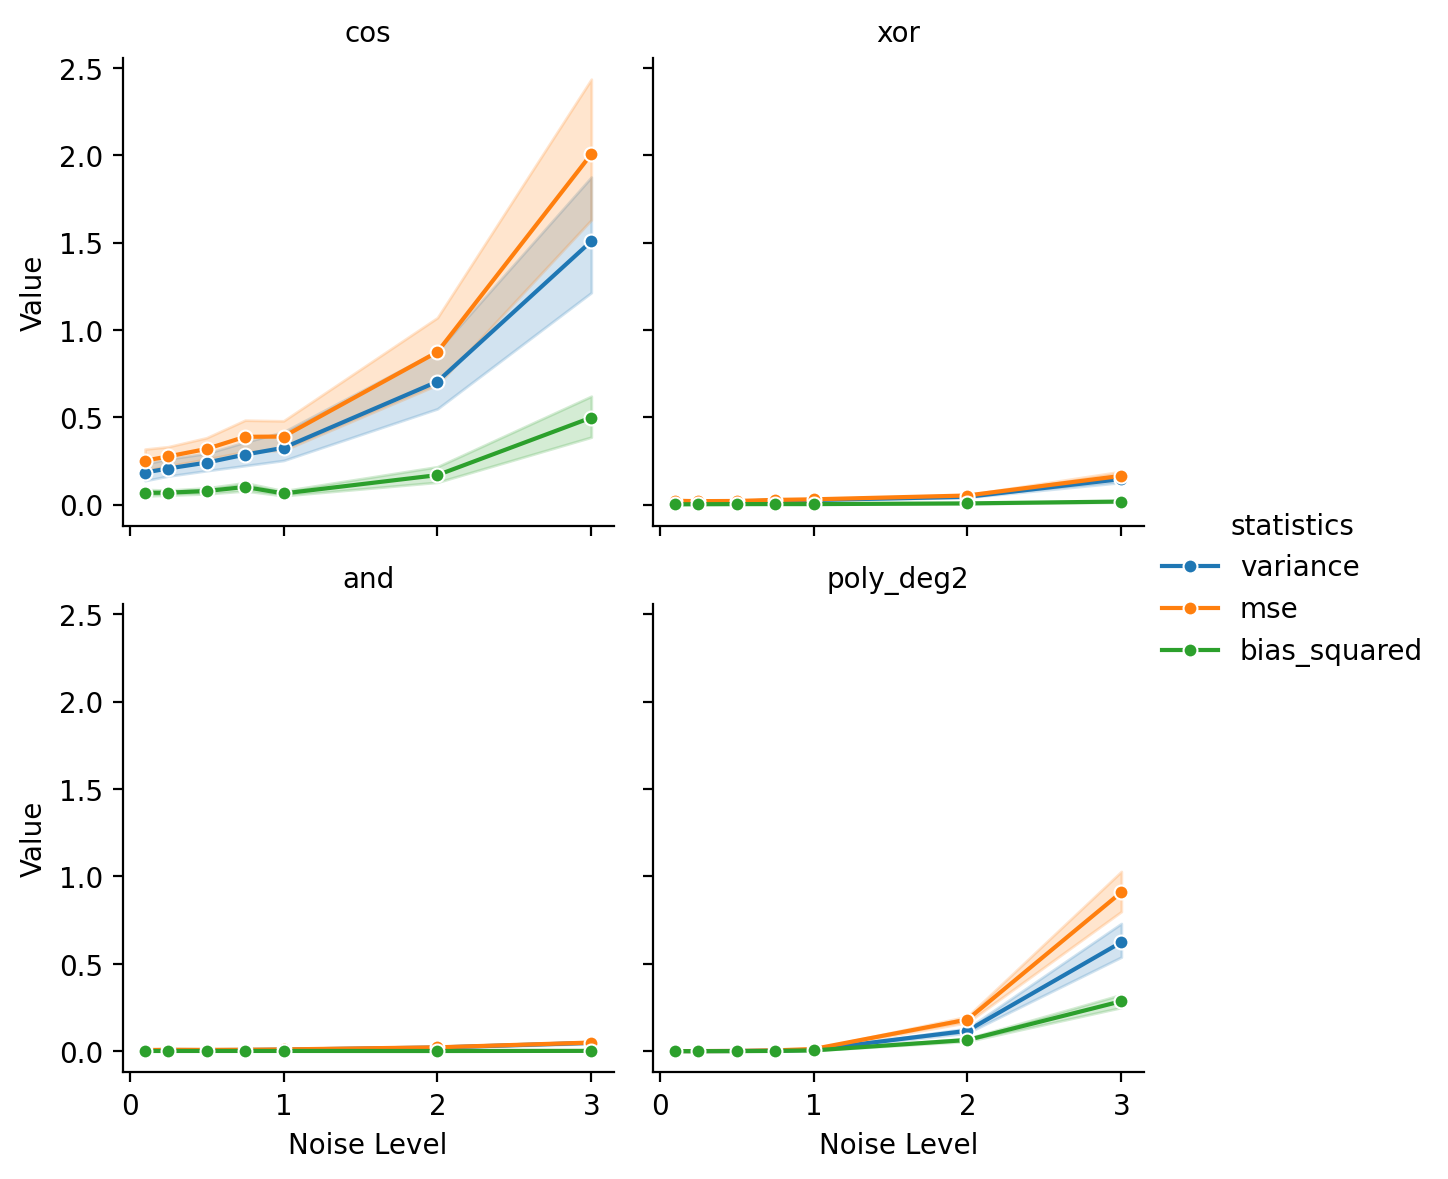

In [6]:
# facet grid by function plot lineplot of value vs. rho, hue = statistics
g = sns.FacetGrid(data_melted, col='Function', hue='statistics', col_wrap=2)
g.map(sns.lineplot, 'noise_level', 'value', marker='o', markersize=5)
g.add_legend()
g.set_axis_labels('Noise Level', 'Value')
g.set_titles(col_template="{col_name}")
g.fig.set_dpi(200)